In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Data cleaning

In [2]:
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

In [3]:
train_data.dropna(subset=['Electrical'], inplace=True)

In [4]:
test_missing_columns = test_data.isnull().any()
columns_with_missing_data_indices = test_missing_columns[test_missing_columns].index.tolist()
columns_with_missing_data_indices

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [5]:
train_data.drop(columns=columns_with_missing_data_indices, axis=1, inplace=True)
test_data.drop(columns=columns_with_missing_data_indices, axis=1, inplace=True)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train_data.drop(columns='MSSubClass', axis=1, inplace=True)

In [8]:
train_data.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF"}, inplace=True)
train_data.head()

,Id,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500
1,2,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500
2,3,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500
3,4,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000
4,5,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('crest')
sns.set_style('whitegrid')
sns.despine()
sns.set_context('paper')

<Figure size 640x480 with 0 Axes>

In [10]:
train_data['YrFBuild'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['YrFRemod'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data.head(5)

,Id,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YrFBuild,YrFRemod
0,1,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000,8,8


# K-Nearest Neighbors

## Data standardization

In [11]:
# Scale features using statistics that are robust to outliers.
#This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). 
#The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

from sklearn.preprocessing import RobustScaler

In [12]:
scaler = RobustScaler()

In [13]:
df = train_data[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod','TotRmsAbvGrd','FullBath']]
scaler.fit(df)

RobustScaler()

In [14]:
scaled_features = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod','TotRmsAbvGrd','FullBath'])
df_scaled.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,YrFBuild,YrFRemod,TotRmsAbvGrd,FullBath
0,-0.253330,0.5,-0.455348,1.173077,-1.0,0.000000,0.529412,-0.652174,-0.243243,1.0,0.0
1,0.030340,0.0,0.341511,0.000000,0.0,1.773810,-0.367647,-0.086957,0.459459,0.0,0.0
2,0.437346,0.5,-0.329735,1.189560,0.0,0.000000,0.250000,-0.608696,-0.216216,0.0,0.0
3,0.018007,0.5,-0.249264,1.038462,0.0,0.000000,0.147059,1.217391,0.594595,0.5,-1.0
4,1.179822,1.0,0.111874,1.446429,0.0,1.142857,0.867647,-0.586957,-0.162162,1.5,0.0


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df_scaled
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

## Applying K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [19]:
pred = knn.predict(X_val)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 1293120434.60
Root Mean Squared Error (RMSE): 35959.98
R-squared (R2): 0.80


# Choosing a K value

Let's try the elbow method to find an appropriate number of neighbors.

In [21]:
k_values = range(1, 20)

mse_list = []
rmse_list = []

for k in k_values:
    
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_val)

    mse = mean_squared_error(y_val, pred)
    rmse = np.sqrt(mse)
    
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"K = {k}, RMSE = {rmse:.2f}")

K = 1, RMSE = 46419.32
K = 2, RMSE = 37308.42
K = 3, RMSE = 37162.73
K = 4, RMSE = 36597.49
K = 5, RMSE = 35959.98
K = 6, RMSE = 34739.92
K = 7, RMSE = 34381.76
K = 8, RMSE = 34541.16
K = 9, RMSE = 34421.16
K = 10, RMSE = 34180.18
K = 11, RMSE = 34689.11
K = 12, RMSE = 34956.00
K = 13, RMSE = 34939.58
K = 14, RMSE = 35545.14
K = 15, RMSE = 35896.15
K = 16, RMSE = 36225.25
K = 17, RMSE = 36033.31
K = 18, RMSE = 36214.71
K = 19, RMSE = 36235.92


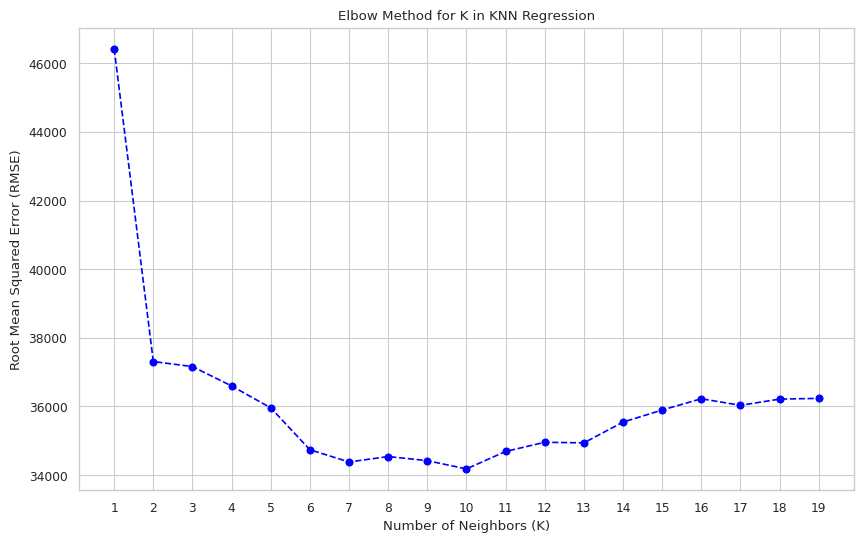

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_list, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for K in KNN Regression')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Let's retrain the model with k=10.

In [23]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [24]:
pred = knn.predict(X_val)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 1168285029.91
Root Mean Squared Error (RMSE): 34180.18
R-squared (R2): 0.82


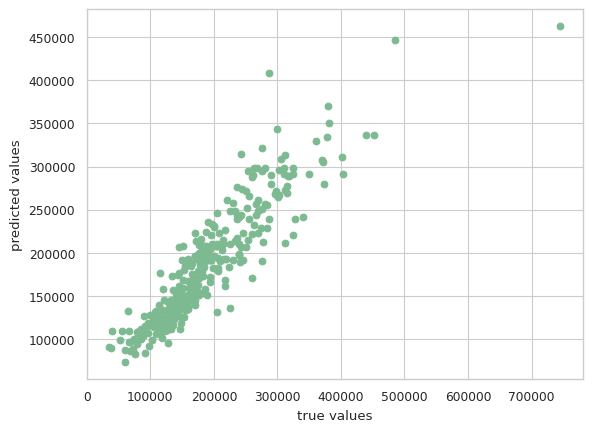

In [25]:
plt.scatter(x=y_val, y=pred)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

# K-Nearest Neighbors for feature engineering 

In [26]:
pred_train = pd.Series(knn.predict(X_train))
pred_val = pd.Series(knn.predict(X_val))

pred_train.index = y_train.index
pred_val.index = y_val.index

preds = pd.concat([pred_train, pred_val])
preds = preds.round(2)

In [27]:
preds

847     133280.0
809     134630.0
1384    102400.0
1061    119200.0
952     130360.0
          ...   
679     116930.0
243     158495.0
1036    268857.7
910     144245.3
968      89517.6
Length: 1459, dtype: float64

In [28]:
train_data['KNNpred'] = preds
train_data

,Id,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YrFBuild,YrFRemod,KNNpred
0,1,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,Normal,208500,5,5,208360.0
1,2,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,Normal,181500,31,31,158300.0
2,3,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,Normal,223500,7,6,217750.0
3,4,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,Abnorml,140000,91,36,173800.0
4,5,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,Normal,250000,8,8,266871.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,953,694,0,1647,2,1,3,1,7,1,Y,0,40,0,0,0,0,0,8,2007,Normal,175000,8,7,172889.0
1456,1457,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,2073,0,0,2073,2,0,3,1,7,2,Y,349,0,0,0,0,0,0,2,2010,Normal,210000,32,22,209090.0
1457,1458,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,Ex,Gd,Stone,GasA,Ex,Y,SBrkr,1188,1152,0,2340,2,0,4,1,9,2,Y,0,60,0,0,0,0,2500,5,2010,Normal,266500,69,4,223630.0
1458,1459,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,TA,TA,CBlock,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,2,1,5,0,Y,366,0,112,0,0,0,0,4,2010,Normal,142125,60,14,134622.5


# Linear regression with new feature

This time, let's try statsmodel Python module.

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
Xlm = train_data[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','YrFRemod','KNNpred','Neighborhood','BldgType','SaleCondition']]
ylm = train_data['SalePrice']
Xlm_train, Xlm_val, ylm_train, ylm_val = train_test_split(Xlm, ylm, test_size=0.25, random_state=42)

In [31]:
train_indexes = Xlm_train.index
train_indexes

Index([ 847,  809, 1384, 1061,  952,  838,  370,   54,  534, 1205,
       ...
        330, 1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1126],
      dtype='int64', length=1094)

In [32]:
val_indexes = Xlm_val.index
val_indexes

Index([1321,  836,  413,  522, 1035,  614,  218, 1031, 1289,  886,
       ...
        346, 1213, 1279, 1182, 1118,  679,  243, 1036,  910,  968],
      dtype='int64', length=365)

In [33]:
Neighborhood_train = Xlm_train['Neighborhood']
prices_train = ylm_train

In [34]:
Neighborhood_prices = pd.concat([Neighborhood_train, prices_train], axis=1)
NP_gr = Neighborhood_prices.groupby('Neighborhood')['SalePrice'].median().reset_index()
NP_gr = NP_gr.rename(columns={'SalePrice':'MedianPriceNeighborhood'})
NP_gr

,Neighborhood,MedianPriceNeighborhood
0,Blmngtn,181000.0
1,Blueste,124000.0
2,BrDale,100000.0
3,BrkSide,118500.0
4,ClearCr,196000.0
5,CollgCr,200000.0
6,Crawfor,200100.0
7,Edwards,127500.0
8,Gilbert,184550.0
9,IDOTRR,107250.0


In [35]:
Xlm_train = Xlm_train.merge(NP_gr, on='Neighborhood').set_index(train_indexes)
Xlm_train.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,YrFRemod,KNNpred,Neighborhood,BldgType,SaleCondition,MedianPriceNeighborhood
847,15523,5,864,0,1,0,37,133280.0,CollgCr,1Fam,Normal,200000.0
809,8100,5,1075,1063,0,40,44,134630.0,OldTown,1Fam,Normal,122250.0
1384,9060,6,698,560,0,0,59,102400.0,Edwards,1Fam,Normal,127500.0
1061,18000,3,894,0,0,0,58,119200.0,IDOTRR,1Fam,Normal,107250.0
952,7200,5,768,0,0,192,6,130360.0,CollgCr,1Fam,Normal,200000.0


In [36]:
Xlm_val = Xlm_val.merge(NP_gr, on='Neighborhood').set_index(val_indexes)
Xlm_val.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,YrFRemod,KNNpred,Neighborhood,BldgType,SaleCondition,MedianPriceNeighborhood
1321,6627,3,720,0,0,0,58,89430.0,BrkSide,1Fam,Normal,118500.0
836,8100,5,1559,0,0,0,34,140960.0,OldTown,1Fam,Normal,122250.0
413,8960,5,1028,0,1,0,60,116205.0,OldTown,1Fam,Normal,122250.0
522,5000,6,1004,660,2,0,56,150960.0,BrkSide,1Fam,Normal,118500.0
1035,11500,4,845,0,0,186,52,107850.0,Edwards,1Fam,Normal,127500.0


In [37]:
BldgType_train = Xlm_train['BldgType']

BldgType_prices = pd.concat([BldgType_train, prices_train], axis=1)
BT_gr = BldgType_prices.groupby('BldgType')['SalePrice'].median().reset_index()
BT_gr = BT_gr.rename(columns={'SalePrice':'MedianPriceBldgType'})
BT_gr

,BldgType,MedianPriceBldgType
0,1Fam,165500.0
1,2fmCon,128250.0
2,Duplex,135000.0
3,Twnhs,137500.0
4,TwnhsE,174000.0


In [38]:
Xlm_train = Xlm_train.merge(BT_gr, on='BldgType').set_index(train_indexes)
Xlm_train.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,YrFRemod,KNNpred,Neighborhood,BldgType,SaleCondition,MedianPriceNeighborhood,MedianPriceBldgType
847,15523,5,864,0,1,0,37,133280.0,CollgCr,1Fam,Normal,200000.0,165500.0
809,8100,5,1075,1063,0,40,44,134630.0,OldTown,1Fam,Normal,122250.0,165500.0
1384,9060,6,698,560,0,0,59,102400.0,Edwards,1Fam,Normal,127500.0,165500.0
1061,18000,3,894,0,0,0,58,119200.0,IDOTRR,1Fam,Normal,107250.0,165500.0
952,7200,5,768,0,0,192,6,130360.0,CollgCr,1Fam,Normal,200000.0,165500.0


In [39]:
Xlm_val = Xlm_val.merge(BT_gr, on='BldgType').set_index(val_indexes)
Xlm_val.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,YrFRemod,KNNpred,Neighborhood,BldgType,SaleCondition,MedianPriceNeighborhood,MedianPriceBldgType
1321,6627,3,720,0,0,0,58,89430.0,BrkSide,1Fam,Normal,118500.0,165500.0
836,8100,5,1559,0,0,0,34,140960.0,OldTown,1Fam,Normal,122250.0,165500.0
413,8960,5,1028,0,1,0,60,116205.0,OldTown,1Fam,Normal,122250.0,165500.0
522,5000,6,1004,660,2,0,56,150960.0,BrkSide,1Fam,Normal,118500.0,165500.0
1035,11500,4,845,0,0,186,52,107850.0,Edwards,1Fam,Normal,127500.0,165500.0


In [40]:
SaleCondition_train = Xlm_train['SaleCondition']

SaleCondition_prices = pd.concat([SaleCondition_train, prices_train], axis=1)
SC_gr = SaleCondition_prices.groupby('SaleCondition')['SalePrice'].median().reset_index()
SC_gr = SC_gr.rename(columns={'SalePrice':'MedianPriceSaleCondition'})
SC_gr

,SaleCondition,MedianPriceSaleCondition
0,Abnorml,132000.0
1,AdjLand,104000.0
2,Alloca,160976.5
3,Family,135000.0
4,Normal,159000.0
5,Partial,248328.0


In [41]:
Xlm_train = Xlm_train.merge(SC_gr, on='SaleCondition').set_index(train_indexes)
Xlm_train.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,YrFRemod,KNNpred,Neighborhood,BldgType,SaleCondition,MedianPriceNeighborhood,MedianPriceBldgType,MedianPriceSaleCondition
847,15523,5,864,0,1,0,37,133280.0,CollgCr,1Fam,Normal,200000.0,165500.0,159000.0
809,8100,5,1075,1063,0,40,44,134630.0,OldTown,1Fam,Normal,122250.0,165500.0,159000.0
1384,9060,6,698,560,0,0,59,102400.0,Edwards,1Fam,Normal,127500.0,165500.0,159000.0
1061,18000,3,894,0,0,0,58,119200.0,IDOTRR,1Fam,Normal,107250.0,165500.0,159000.0
952,7200,5,768,0,0,192,6,130360.0,CollgCr,1Fam,Normal,200000.0,165500.0,159000.0


In [42]:
Xlm_val = Xlm_val.merge(SC_gr, on='SaleCondition').set_index(val_indexes)
Xlm_val.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,YrFRemod,KNNpred,Neighborhood,BldgType,SaleCondition,MedianPriceNeighborhood,MedianPriceBldgType,MedianPriceSaleCondition
1321,6627,3,720,0,0,0,58,89430.0,BrkSide,1Fam,Normal,118500.0,165500.0,159000.0
836,8100,5,1559,0,0,0,34,140960.0,OldTown,1Fam,Normal,122250.0,165500.0,159000.0
413,8960,5,1028,0,1,0,60,116205.0,OldTown,1Fam,Normal,122250.0,165500.0,159000.0
522,5000,6,1004,660,2,0,56,150960.0,BrkSide,1Fam,Normal,118500.0,165500.0,159000.0
1035,11500,4,845,0,0,186,52,107850.0,Edwards,1Fam,Normal,127500.0,165500.0,159000.0


In [43]:
Xlm_train.drop(['Neighborhood','BldgType','SaleCondition'], axis=1, inplace=True)
Xlm_val.drop(['Neighborhood','BldgType','SaleCondition'], axis=1, inplace=True)

In [44]:
ols_formula = 'SalePrice ~ LotArea + OverallQual + FirstFlrSF + SecondFlrSF + Fireplaces + WoodDeckSF + YrFRemod + KNNpred + MedianPriceNeighborhood + MedianPriceBldgType + MedianPriceSaleCondition'

ols_data = pd.concat([Xlm_train, ylm_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     530.0
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:58:14   Log-Likelihood:                -12875.
No. Observations:                1094   AIC:                         2.577e+04
Df Residuals:                    1082   BIC:                         2.583e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.23e+05   1.85e+04     -6.659      0.000   -1.59e+05   -8.67e+04
LotArea                      0.0339      0.100      0.338      0.735      -0.163       0.230
OverallQual               4244.3440   1326.137      3.201      0.001    1642.253    6846.435
FirstFlrSF                  19.8000      4.220      4.692      0.000      11.521      28.079
SecondFlrSF                 16.9250      2.962      5.714      0.000      11.113      22.737
Fireplaces                 605.4529   1792.905      0.338      0.736   -2912.512    4123.418
WoodDeckSF                   4.3040      8.258      0.521      0.602     -11.900      20.508
YrFRemod                   108.3073     60.662      1.785      0.074     -10.722     227.336
KNNpred                      0.8067      0.044     18.181      0.000       0.720       0.894
MedianPriceNeighborhood      0.1977      0.028      7.158      0.000       0.143       0.252
MedianPriceBldgType          0.2204      0.103      2.130      0.033       0.017       0.423
MedianPriceSaleCondition     0.1896      0.040      4.769      0.000       0.112       0.268
==============================================================================
Omnibus:                      371.475   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12687.918
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                      19.589   Cond. No.                     6.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
ols_formula = 'SalePrice ~ OverallQual + FirstFlrSF + SecondFlrSF + KNNpred + MedianPriceNeighborhood + MedianPriceBldgType + MedianPriceSaleCondition'

ols_data = pd.concat([Xlm_train, ylm_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     832.0
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:58:14   Log-Likelihood:                -12877.
No. Observations:                1094   AIC:                         2.577e+04
Df Residuals:                    1086   BIC:                         2.581e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.149e+05   1.76e+04     -6.530      0.000   -1.49e+05   -8.04e+04
OverallQual               3763.9554   1275.662      2.951      0.003    1260.914    6266.997
FirstFlrSF                  21.7640      4.079      5.335      0.000      13.760      29.768
SecondFlrSF                 17.7980      2.914      6.108      0.000      12.080      23.516
KNNpred                      0.8000      0.040     20.196      0.000       0.722       0.878
MedianPriceNeighborhood      0.1909      0.027      6.967      0.000       0.137       0.245
MedianPriceBldgType          0.2240      0.102      2.187      0.029       0.023       0.425
MedianPriceSaleCondition     0.1757      0.039      4.500      0.000       0.099       0.252
==============================================================================
Omnibus:                      379.799   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13269.972
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                      19.963   Cond. No.                     6.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
from sklearn import metrics

In [49]:
ylm_predict = model.predict(Xlm_val)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ylm_val, ylm_predict))
print('Mean Squared Error:', metrics.mean_squared_error(ylm_val, ylm_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ylm_val, ylm_predict)))

Mean Absolute Error: 21342.120376506482
Mean Squared Error: 933365516.2941263
Root Mean Squared Error: 30551.03134583391


In [51]:
metrics.explained_variance_score(ylm_val, ylm_predict)

0.8571126260544235

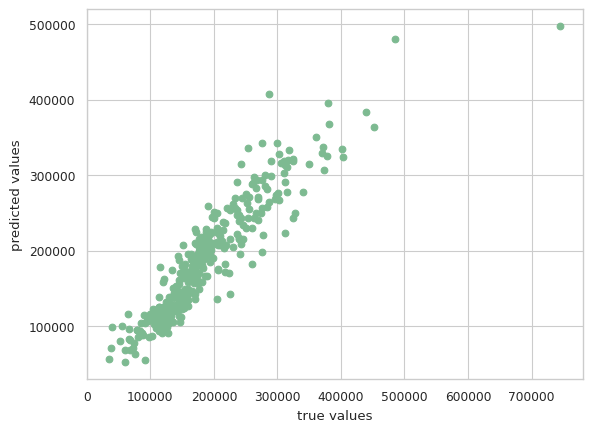

In [52]:
plt.scatter(x=ylm_val, y=ylm_predict)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

# Trying model on testing data

In [53]:
test_data.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal


In [54]:
test_data.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF"}, inplace=True)
test_data.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal


In [55]:
test_data['YrFBuild'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['YrFRemod'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data.head(5)

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,YrFBuild,YrFRemod
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal,49,49
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal,52,52
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal,13,12
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal,12,12
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal,18,18


In [56]:
df_test = test_data[['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod','TotRmsAbvGrd','FullBath']]
scaler.fit(df_test)

RobustScaler()

In [57]:
scaled_test = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(scaled_test, columns=['LotArea','OverallQual','FirstFlrSF','SecondFlrSF','Fireplaces','WoodDeckSF','OpenPorchSF','YrFBuild', 'YrFRemod','TotRmsAbvGrd','FullBath'])
df_test_scaled.head()

,LotArea,OverallQual,FirstFlrSF,SecondFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,YrFBuild,YrFRemod,TotRmsAbvGrd,FullBath
0,0.538713,-0.5,-0.359528,0.000000,0.0,0.833333,-0.388889,0.312500,0.825,-0.5,-1.0
1,1.179692,0.0,0.491159,0.000000,0.0,2.339286,0.111111,0.375000,0.900,0.0,-1.0
2,1.073791,-0.5,-0.296660,1.036982,1.0,1.261905,0.083333,-0.437500,-0.100,0.0,0.0
3,0.140313,0.0,-0.300589,1.002959,1.0,2.142857,0.111111,-0.458333,-0.100,0.5,0.0
4,-1.064825,1.0,0.394892,0.000000,0.0,0.000000,0.750000,-0.333333,0.050,-0.5,0.0


In [58]:
pred_test = pd.Series(knn.predict(df_test_scaled))
pred_test

0       134590.0
1       167540.0
2       197550.0
3       207140.0
4       219940.0
          ...   
1454     97340.0
1455    104200.0
1456    183540.0
1457    134975.0
1458    243650.0
Length: 1459, dtype: float64

In [59]:
test_data['KNNpred'] = pred_test
test_data

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,YrFBuild,YrFRemod,KNNpred
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal,49,49,134590.0
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal,52,52,167540.0
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal,13,12,197550.0
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal,12,12,207140.0
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal,18,18,219940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,TA,TA,CBlock,GasA,Gd,Y,SBrkr,546,546,0,1092,1,1,3,1,5,0,Y,0,0,0,0,0,0,0,6,2006,Normal,36,36,97340.0
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,546,546,0,1092,1,1,3,1,6,0,Y,0,24,0,0,0,0,0,4,2006,Abnorml,36,36,104200.0
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,SBrkr,1224,0,0,1224,1,0,4,1,7,1,Y,474,0,0,0,0,0,0,9,2006,Abnorml,46,10,183540.0
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,TA,TA,PConc,GasA,TA,Y,SBrkr,970,0,0,970,1,0,3,1,6,0,Y,80,32,0,0,0,0,700,7,2006,Normal,14,14,134975.0


In [60]:
test_indexes = test_data.index
test_data = test_data.merge(NP_gr, on='Neighborhood').set_index(test_indexes)
test_data.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,YrFBuild,YrFRemod,KNNpred,MedianPriceNeighborhood
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal,49,49,134590.0,140000.0
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal,52,52,167540.0,140000.0
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal,13,12,197550.0,184550.0
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal,12,12,207140.0,184550.0
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal,18,18,219940.0,276500.0


In [61]:
test_data = test_data.merge(BT_gr, on='BldgType').set_index(test_indexes)
test_data.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,YrFBuild,YrFRemod,KNNpred,MedianPriceNeighborhood,MedianPriceBldgType
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal,49,49,134590.0,140000.0,165500.0
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal,52,52,167540.0,140000.0,165500.0
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal,13,12,197550.0,184550.0,165500.0
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal,12,12,207140.0,184550.0,165500.0
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal,18,18,219940.0,276500.0,174000.0


In [62]:
test_data = test_data.merge(SC_gr, on='SaleCondition').set_index(test_indexes)
test_data.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,YrFBuild,YrFRemod,KNNpred,MedianPriceNeighborhood,MedianPriceBldgType,MedianPriceSaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,896,0,0,896,1,0,2,1,5,0,Y,140,0,0,0,120,0,0,6,2010,Normal,49,49,134590.0,140000.0,165500.0,159000.0
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,TA,TA,CBlock,GasA,TA,Y,SBrkr,1329,0,0,1329,1,1,3,1,6,0,Y,393,36,0,0,0,0,12500,6,2010,Normal,52,52,167540.0,140000.0,165500.0,159000.0
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,TA,TA,PConc,GasA,Gd,Y,SBrkr,928,701,0,1629,2,1,3,1,6,1,Y,212,34,0,0,0,0,0,3,2010,Normal,13,12,197550.0,184550.0,165500.0,159000.0
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,SBrkr,926,678,0,1604,2,1,3,1,7,1,Y,360,36,0,0,0,0,0,6,2010,Normal,12,12,207140.0,184550.0,165500.0,159000.0
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,0,2,1,5,0,Y,0,82,0,0,144,0,0,1,2010,Normal,18,18,219940.0,276500.0,174000.0,159000.0


In [63]:
test_predict = model.predict(test_data)

In [64]:
test_predict

0       122828.204133
1       162377.578010
2       194875.391921
3       205858.927126
4       238719.649428
            ...      
1454     74639.958853
1455     83561.012491
1456    166465.597926
1457    126827.255786
1458    239735.465595
Length: 1459, dtype: float64

In [65]:
submission = pd.concat([test_data['Id'],test_predict], axis = 1)
submission.rename(columns={0:'SalePrice'}, inplace=True)
submission

,Id,SalePrice
0,1461,122828.204133
1,1462,162377.578010
2,1463,194875.391921
3,1464,205858.927126
4,1465,238719.649428
...,...,...
1454,2915,74639.958853
1455,2916,83561.012491
1456,2917,166465.597926
1457,2918,126827.255786


In [66]:
submission.to_csv('submission.csv', index=False)